<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/Regress%C3%A3oLinearPratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/focus.csv')
df

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0


# **Objetivo: entender como as variáveis influenciam no preço de vendas**

In [3]:
df = df.drop('model',axis= 1)
df

,year,price,transmission,mileage,fuelType,engineSize
0,2016,8000,Manual,38852,Petrol,1.0
1,2019,13400,Manual,11952,Petrol,1.0
2,2019,14600,Manual,22142,Petrol,1.5
3,2016,9450,Manual,14549,Diesel,1.6
4,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...
5449,2019,18745,Manual,7855,Diesel,2.0
5450,2019,16350,Manual,13891,Petrol,1.0
5451,2019,16850,Manual,13452,Petrol,1.0
5452,2019,17310,Automatic,13376,Petrol,1.0


In [4]:
df_onehot = pd.get_dummies(df, drop_first= True)
df_onehot

,year,price,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
0,2016,8000,38852,1.0,1,0,1
1,2019,13400,11952,1.0,1,0,1
2,2019,14600,22142,1.5,1,0,1
3,2016,9450,14549,1.6,1,0,0
4,2015,9999,7010,1.6,1,0,0
...,...,...,...,...,...,...,...
5449,2019,18745,7855,2.0,1,0,0
5450,2019,16350,13891,1.0,1,0,1
5451,2019,16850,13452,1.0,1,0,1
5452,2019,17310,13376,1.0,0,0,1


# **Pipilene de Modelagem**

In [5]:
X = df_onehot.drop('price',axis= 1)
y = df_onehot.price

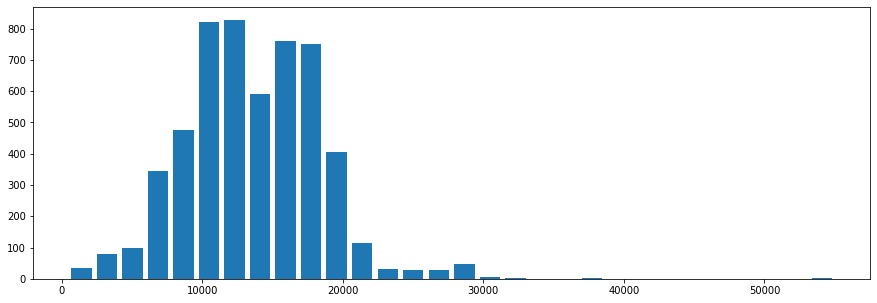

In [6]:
plt.figure(figsize=(15,5))
plt.hist(y, bins=30, rwidth= .8);

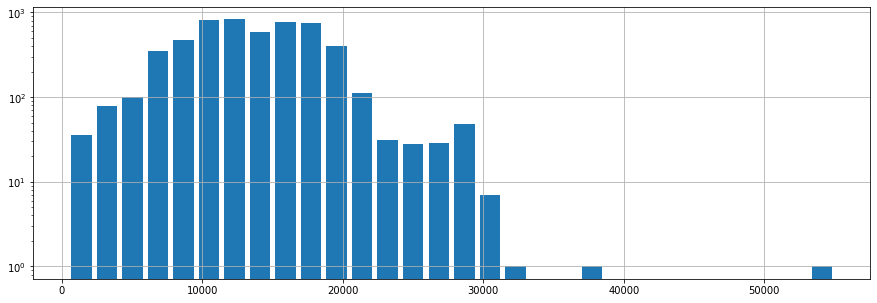

In [7]:
plt.figure(figsize=(15,5))
plt.hist(y, bins=30, rwidth= .8, log= True)
plt.grid();

# **Vamos treinar o Modelo**

In [8]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.30, random_state=61658)

In [9]:
x_treino.shape, x_teste.shape

((3817, 6), (1637, 6))

In [10]:
x_treino = x_treino.copy()
x_teste = x_teste.copy()

from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'year',
    'mileage',
    'engineSize'

]
scaler = {}

for col in cols_to_scale:
  scaler[col] = StandardScaler()
  scaler[col].fit(x_treino[[col]])
  x_treino.loc[:,col] = scaler[col].transform(x_treino[[col]])
  x_teste.loc[:,col] = scaler[col].transform(x_teste[[col]])

In [11]:
x_treino

,year,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
1039,-0.955057,0.975516,0.329983,1,0,0
1497,-0.039459,-0.072012,1.575824,1,0,0
4574,-0.955057,0.350963,1.575824,1,0,1
2860,-0.039459,-0.564356,1.575824,1,0,1
1710,0.876138,-0.574894,-0.915858,0,0,1
...,...,...,...,...,...,...
483,0.876138,-0.953010,-0.915858,1,0,1
4184,-0.955057,2.653544,0.579151,1,0,0
614,0.876138,-0.780242,0.329983,1,0,1
3836,-0.955057,1.155003,1.575824,1,0,1


# **Ajuste do Modelo**

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(
    fit_intercept= True,
    normalize = False,
    n_jobs= 3,
)

lr.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(n_jobs=3, normalize=False)

In [13]:
y_pred = lr.predict(x_teste)
y_pred

array([ 7720.72363582, 15846.34811528, 11686.59464787, ...,
       14696.25327554, 11625.08622673, 14909.56340961])

# **Como validar uma regressão ?**

In [14]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_teste, y_pred))

2113.5835251718386

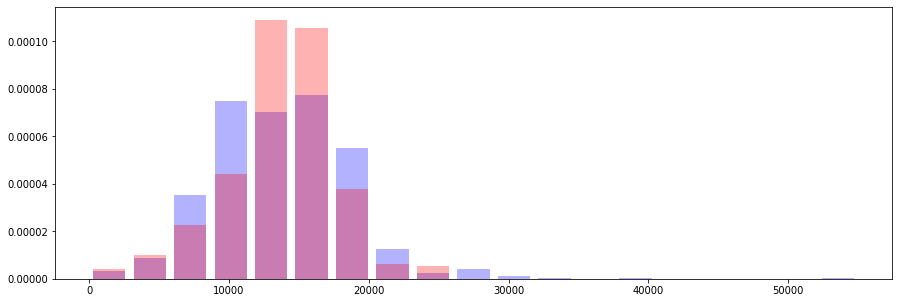

In [15]:
plt.figure(figsize= (15,5))
M = y_teste.max()
plt.hist(y_teste, bins= np.linspace(0,M,20), rwidth=.8, alpha= .3, color='b',density = True)
plt.hist(y_pred, bins= np.linspace(0,M,20), rwidth=.8, alpha= .3, color='r',density = True);

# **Interpretação**

In [16]:
lr.intercept_

12787.79951915774

In [17]:
lr.coef_

array([ 2879.4927325 , -1248.99540827,  2436.37404227,  -843.14949219,
       -1882.46855829,  2351.52658558])